In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/products.csv
/kaggle/input/brands.csv
/kaggle/input/categories.csv
/kaggle/input/order_items.csv
/kaggle/input/staffs.csv
/kaggle/input/orders.csv
/kaggle/input/stores.csv
/kaggle/input/customers.csv
/kaggle/input/stocks.csv


In [2]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
brands=pd.read_csv('/kaggle/input/brands.csv')
categories=pd.read_csv('/kaggle/input/categories.csv')
customers=pd.read_csv('/kaggle/input/customers.csv')
order_items=pd.read_csv('/kaggle/input/order_items.csv')
orders=pd.read_csv('/kaggle/input/orders.csv')
products=pd.read_csv('/kaggle/input/products.csv')
staffs=pd.read_csv('/kaggle/input/staffs.csv')
stocks=pd.read_csv('/kaggle/input/stocks.csv')
stores=pd.read_csv('/kaggle/input/stores.csv')

In [4]:
db=sql.connect('bike_store.db')

In [5]:
brands.to_sql('brands',db,if_exists='replace',index=False)

9

In [6]:
print("Number of rows in brands: " + str(brands.to_sql('brands',db,if_exists='replace',index=False)))
print("Number of rows in categories: " + str(categories.to_sql('categories',db,if_exists='replace',index=False)))
print("Number of rows in customers: " + str(customers.to_sql('customers',db,if_exists='replace',index=False)))
print("Number of rows in order_items: " + str(order_items.to_sql('order_items',db,if_exists='replace',index=False)))
print("Number of rows in orders: " + str(orders.to_sql('orders',db,if_exists='replace',index=False)))
print("Number of rows in products: " + str(products.to_sql('products',db,if_exists='replace',index=False)))
print("Number of rows in staffs: " + str(staffs.to_sql('staffs',db,if_exists='replace',index=False)))
print("Number of rows in stocks: " + str(stocks.to_sql('stocks',db,if_exists='replace',index=False)))
print("Number of rows in stores: " + str(stores.to_sql('stores',db,if_exists='replace',index=False)))

Number of rows in brands: 9
Number of rows in categories: 7
Number of rows in customers: 1445
Number of rows in order_items: 4722
Number of rows in orders: 1615
Number of rows in products: 321
Number of rows in staffs: 10
Number of rows in stocks: 939
Number of rows in stores: 3


In [7]:
q1="""
select * from categories
"""
pd.read_sql_query(q1,db)

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


In [8]:
""" fetch for each customer how many orders did they place. 
Return first name, last name, order count"""

q2 = """
select c.customer_id,c.first_name,c.last_name,count(o.order_id) as order_counts
from customers c join orders o using(customer_id)
group by 1,2,3
"""
pd.read_sql_query(q2,db)

,customer_id,first_name,last_name,order_counts
0,1,Debra,Burks,3
1,2,Kasha,Todd,3
2,3,Tameka,Fisher,3
3,4,Daryl,Spence,3
4,5,Charolette,Rice,3
...,...,...,...,...
1440,1441,Jamaal,Morrison,1
1441,1442,Cassie,Cline,1
1442,1443,Lezlie,Lamb,1
1443,1444,Ivette,Estes,1


In [9]:
## No.of stocks based on category name and store name

q3 = """
select s.store_name,c.category_name, sum(st.quantity) as No_of_stocks
from stores s join stocks st using(store_id)
join products p using(product_id)
join categories c using(category_id)
group by 1,2
"""

results=pd.read_sql_query(q3,db)
results

,store_name,category_name,No_of_stocks
0,Baldwin Bikes,Children Bicycles,769
1,Baldwin Bikes,Comfort Bicycles,393
2,Baldwin Bikes,Cruisers Bicycles,1137
3,Baldwin Bikes,Cyclocross Bicycles,97
4,Baldwin Bikes,Electric Bikes,328
5,Baldwin Bikes,Mountain Bikes,877
6,Baldwin Bikes,Road Bikes,758
7,Rowlett Bikes,Children Bicycles,887
8,Rowlett Bikes,Comfort Bicycles,440
9,Rowlett Bikes,Cruisers Bicycles,1148


In [10]:
results['store_name'].unique()

array(['Baldwin Bikes', 'Rowlett Bikes', 'Santa Cruz Bikes'], dtype=object)

In [11]:
data=results.groupby(['store_name','category_name'])['No_of_stocks'].sum().unstack().fillna(0)
data

category_name,Children Bicycles,Comfort Bicycles,Cruisers Bicycles,Cyclocross Bicycles,Electric Bikes,Mountain Bikes,Road Bikes
store_name,,,,,,,
Baldwin Bikes,769,393,1137,97,328,877,758
Rowlett Bikes,887,440,1148,159,412,928,646
Santa Cruz Bikes,952,425,1093,158,368,849,687


(array([0, 1, 2]),
 [Text(0, 0, 'Baldwin Bikes'),
  Text(1, 0, 'Rowlett Bikes'),
  Text(2, 0, 'Santa Cruz Bikes')])

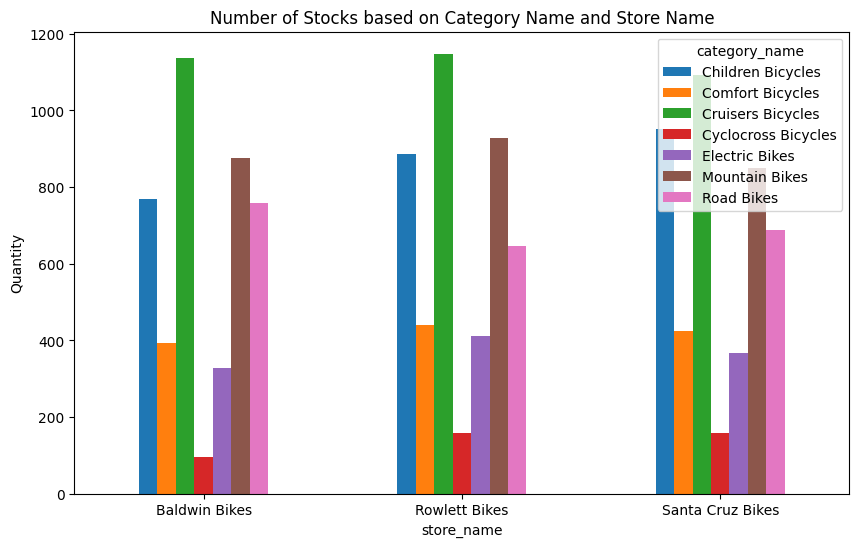

In [12]:
ax=data.plot(kind="bar",figsize=(10,6))
plt.title("Number of Stocks based on Category Name and Store Name")
plt.ylabel("Quantity")
plt.xticks(rotation=0)

comnets/notes : we can also store the output from sql query as a table in database by to_sql() syntax

In [13]:
## number of order items based on store name and category name

q=""" 
select 
s.store_name,
c.category_name,
sum(ot.quantity)as tot_qun
from
orders o join order_items ot using(order_id)
join stores s on o.store_id=s.store_id
join products p on ot.product_id = p.product_id
join categories c on p.category_id = c.category_id
group by 1,2
"""

result=pd.read_sql_query(q,db)
result

,store_name,category_name,tot_qun
0,Baldwin Bikes,Children Bicycles,811
1,Baldwin Bikes,Comfort Bicycles,555
2,Baldwin Bikes,Cruisers Bicycles,1396
3,Baldwin Bikes,Cyclocross Bicycles,271
4,Baldwin Bikes,Electric Bikes,202
5,Baldwin Bikes,Mountain Bikes,1170
6,Baldwin Bikes,Road Bikes,374
7,Rowlett Bikes,Children Bicycles,117
8,Rowlett Bikes,Comfort Bicycles,87
9,Rowlett Bikes,Cruisers Bicycles,245


In [14]:
data=result.groupby(['store_name','category_name'])['tot_qun'].sum().unstack().fillna(0)
data

category_name,Children Bicycles,Comfort Bicycles,Cruisers Bicycles,Cyclocross Bicycles,Electric Bikes,Mountain Bikes,Road Bikes
store_name,,,,,,,
Baldwin Bikes,811,555,1396,271,202,1170,374
Rowlett Bikes,117,87,245,32,33,197,72
Santa Cruz Bikes,251,171,422,91,80,388,113


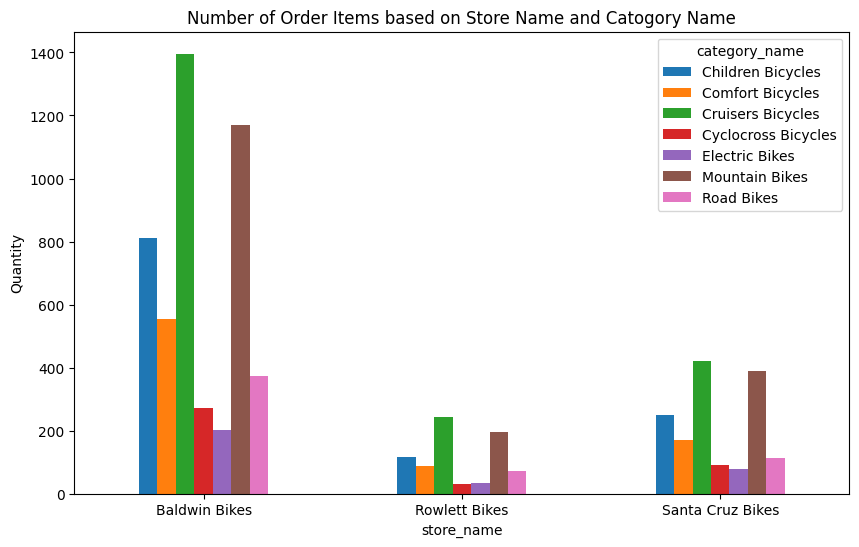

In [15]:
ax=data.plot(kind="bar",figsize=(10,6))
plt.title("Number of Order Items based on Store Name and Catogory Name")
plt.ylabel("Quantity")
plt.xticks(rotation = 0)
plt.show()

In [16]:
# to highest one

result.sort_values(by="tot_qun",ascending=False).head(1)

,store_name,category_name,tot_qun
2,Baldwin Bikes,Cruisers Bicycles,1396


In [17]:
# total sales amount in Santa Cruz Bikes store based on year and month

q="""
select
STRFTIME('%Y-%m',o.order_date) as year_month,
sum(ot.quantity * ot.list_price) as total_sales
from orders o join stores s using(store_id)
join order_items ot using(order_id)
where s.store_name="Santa Cruz Bikes"
group by 1
"""

result=pd.read_sql_query(q,db)
result

,year_month,total_sales
0,2016-01,80495.49
1,2016-02,39364.58
2,2016-03,51404.61
3,2016-04,37396.62
4,2016-05,30951.74
5,2016-06,45534.63
6,2016-07,23452.84
7,2016-08,50002.62
8,2016-09,72394.43
9,2016-10,77645.33


In [18]:
result.dtypes

year_month      object
total_sales    float64
dtype: object

In [19]:
result['year_month']=pd.to_datetime(result['year_month'],format="%Y-%m")

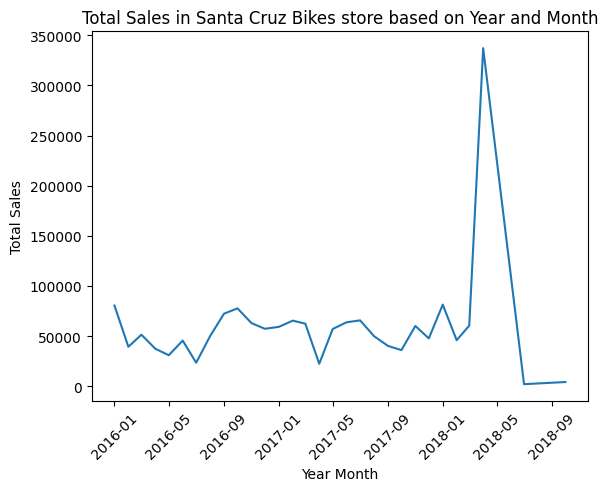

In [20]:
plt.plot(result['year_month'],result['total_sales'])
plt.title("Total Sales in Santa Cruz Bikes store based on Year and Month")
plt.xlabel("Year Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


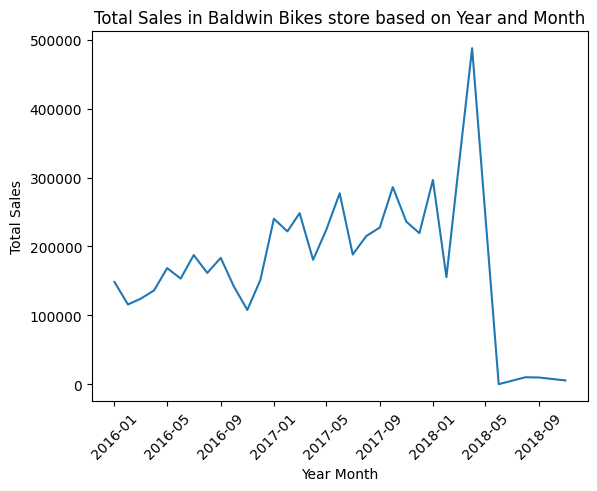

In [21]:
# total sales amount in Baldwin Bikes store based on year and month

q="""
select
STRFTIME('%Y-%m',o.order_date) as year_month,
sum(ot.quantity * ot.list_price) as total_sales
from orders o join stores s using(store_id)
join order_items ot using(order_id)
where s.store_name="Baldwin Bikes"
group by 1
"""

result=pd.read_sql_query(q,db)
result['year_month']=pd.to_datetime(result['year_month'],format="%Y-%m")

plt.plot(result['year_month'],result['total_sales'])
plt.title("Total Sales in Baldwin Bikes store based on Year and Month")
plt.xlabel("Year Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

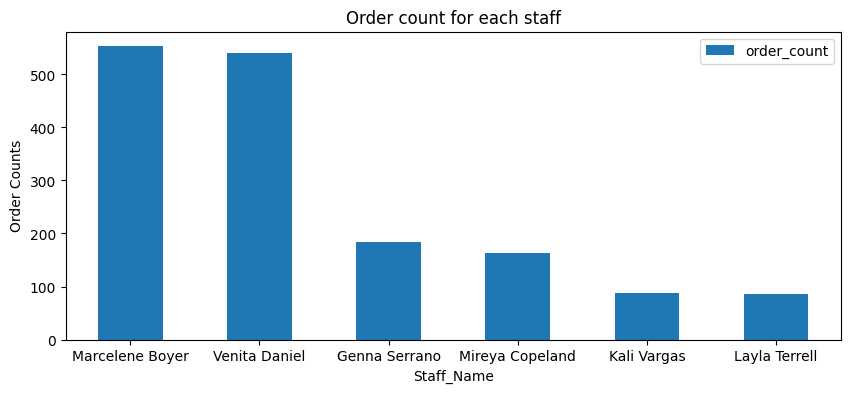

In [22]:
# which staff has highest number of orders

q1="""
select s.first_name || " " || s.last_name as Staff_Name, 
        count(o.order_id) as order_count
from orders o join staffs s using(staff_id)
group by 1
order by 2 desc
"""
result1=pd.read_sql_query(q1,db)
result1.plot(kind="bar", x="Staff_Name",y="order_count",figsize=(10,4))
plt.title("Order count for each staff")
plt.ylabel("Order Counts")
plt.xticks(rotation=0)
plt.show()

In [23]:
# Top 10 cities by no.of.customers

q2="""
select city, count(customer_id) as No_of_Customers
from customers
group by 1
order by 2 desc
limit 10
"""
result2=pd.read_sql_query(q2,db)
result2

,city,No_of_Customers
0,Mount Vernon,20
1,Scarsdale,17
2,Ballston Spa,17
3,Canandaigua,14
4,Ossining,13
5,Longview,13
6,Floral Park,13
7,Webster,12
8,Sunnyside,12
9,Smithtown,12


In [24]:
# Top 10 States by no.of.customers

q2="""
select state, count(customer_id) as No_of_Customers
from customers
group by 1
order by 2 desc
limit 10
"""
result2=pd.read_sql_query(q2,db)
result2

,state,No_of_Customers
0,NY,1019
1,CA,284
2,TX,142


In [25]:
# Top 10 Zipcodes by no.of.customers

q2="""
select zip_code, count(customer_id) as No_of_Customers
from customers
group by 1
order by 2 desc
limit 10
"""
result2=pd.read_sql_query(q2,db)
result2

,zip_code,No_of_Customers
0,10550,20
1,12020,17
2,10583,17
3,14424,14
4,75604,13
5,11001,13
6,10562,13
7,91387,12
8,76901,12
9,14580,12


In [26]:
# No.of orders by each year and month wise

q3="""
select strftime("%Y-%m",order_date)as year_month,
count(order_id) as counts
from orders
group by 1
"""
result3=pd.read_sql_query(q3,db)
result3

,year_month,counts
0,2016-01,50
1,2016-02,49
2,2016-03,55
3,2016-04,43
4,2016-05,51
5,2016-06,45
6,2016-07,50
7,2016-08,63
8,2016-09,67
9,2016-10,64


In [27]:
# Top 10 cities and states by no.of.stores

q4="""
select city,count(store_id) as No_of_stores
from stores
group by 1
order by 2 desc
limit 10
"""
result4= pd.read_sql_query(q4,db)
result4

,city,No_of_stores
0,Santa Cruz,1
1,Rowlett,1
2,Baldwin,1


In [28]:
q4="""
select *
from stores
"""
result4= pd.read_sql_query(q4,db)
result4

,store_id,store_name,phone,email,street,city,state,zip_code
0,1,Santa Cruz Bikes,(831) 476-4321,santacruz@bikes.shop,3700 Portola Drive,Santa Cruz,CA,95060
1,2,Baldwin Bikes,(516) 379-8888,baldwin@bikes.shop,4200 Chestnut Lane,Baldwin,NY,11432
2,3,Rowlett Bikes,(972) 530-5555,rowlett@bikes.shop,8000 Fairway Avenue,Rowlett,TX,75088


In [29]:
# Which are the top 10 best-selling products?

q5="""
select p.product_name, 
count(*) as total_counts,
(ot.quantity * ot.list_price) as revenue
from products p join order_items ot using(product_id)
group by 1
order by 2 desc,3 desc
"""

result5=pd.read_sql_query(q5,db)
result5

,product_name,total_counts,revenue
0,Electra Townie Original 21D - 2016,193,549.99
1,Electra Cruiser 1 (24-Inch) - 2016,193,269.99
2,Electra Townie Original 7D EQ - 2016,185,599.99
3,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,180,269.99
4,Surly Ice Cream Truck Frameset - 2016,110,469.99
...,...,...,...
273,Electra Soft Serve 1 (16-inch) - Girl's - 2018,1,279.99
274,Electra Straight 8 1 (16-inch) - Boy's - 2018,1,279.99
275,Electra Cruiser 1 Tall - 2016/2018,1,269.99
276,Trek MT 201 - 2018,1,249.99


In [30]:
# Which categories generate the most revenue?

q6="""
select c.category_name, (ot.quantity * ot.list_price) as revneue
from categories c join products p using(category_id)
join order_items ot using(product_id)
group by 1
order by 2 desc
"""

result6=pd.read_sql_query(q6,db)
result6

,category_name,revneue
0,Electric Bikes,2999.99
1,Cyclocross Bicycles,1549.00
2,Road Bikes,1499.99
3,Mountain Bikes,749.99
4,Cruisers Bicycles,549.99
5,Comfort Bicycles,549.99
6,Children Bicycles,269.99


In [31]:
# Which stores have the highest sales?

q7 = """
select store_name, (ot.quantity * ot.list_price) as revneue
from stores s join orders o using(store_id)
join order_items ot using(order_id)
group by 1
order by 2 desc
"""

result7 = pd.read_sql_query(q7,db)
result7

,store_name,revneue
0,Rowlett Bikes,3361.98
1,Santa Cruz Bikes,599.99
2,Baldwin Bikes,599.99


In [32]:
# Who are the top 5 customers by total spending?

q8="""
select c.first_name || " " || c.last_name as Customer_Name,
(ot.quantity * ot.list_price) as Total_Spending
from customers c join orders o using(customer_id)
join order_items ot using(order_id)
group by 1
order by 2 desc
limit 5
"""

result8=pd.read_sql_query(q8,db)
result8

,Customer_Name,Total_Spending
0,Hae Ramirez,12999.98
1,Marilyn Frank,9999.98
2,Ester Acevedo,9999.98
3,Rona Rojas,7999.98
4,Neil Mccall,7999.98


In [33]:
# What is the average order value?

q9="""
select sum(ot.quantity * ot.list_price * (1-ot.discount))/count(distinct order_id)as Average_order_value
from orders o join order_items ot using(order_id)
"""

result9=pd.read_sql_query(q9,db)
result9

,Average_order_value
0,4761.062884


In [34]:
# How does discount affect sales volume or revenue?

q10="""SELECT
    CASE
        WHEN oi.discount > 0 THEN 'Discounted'
        ELSE 'No Discount'
    END AS DiscountStatus,
    SUM(oi.quantity) AS TotalSalesVolume,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue
FROM
    order_items AS oi
GROUP BY
    DiscountStatus;
"""

result10=pd.read_sql_query(q10,db)
result10

,DiscountStatus,TotalSalesVolume,TotalRevenue
0,Discounted,7078,7.689117e+06


In [35]:
# Impact by Discount Percentage Band

q11 = """
SELECT
    CASE
        WHEN oi.discount = 0 THEN '0% Discount'
        WHEN oi.discount > 0 AND oi.discount <= 0.05 THEN '0-5% Discount'
        WHEN oi.discount > 0.05 AND oi.discount <= 0.10 THEN '5-10% Discount'
        WHEN oi.discount > 0.10 AND oi.discount <= 0.15 THEN '10-15% Discount'
        WHEN oi.discount > 0.15 AND oi.discount <= 0.20 THEN '15-20% Discount'
        ELSE '>20% Discount'
    END AS DiscountBand,
    SUM(oi.quantity) AS TotalSalesVolume,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue,
    COUNT(oi.product_id) AS NumberOfProductsSoldWithThisDiscount -- Count of individual items sold
FROM
    order_items AS oi
GROUP BY
    DiscountBand
ORDER BY
    DiscountBand;
"""

result11=pd.read_sql_query(q11,db)
result11

,DiscountBand,TotalSalesVolume,TotalRevenue,NumberOfProductsSoldWithThisDiscount
0,0-5% Discount,1836,2.138329e+06,1205
1,15-20% Discount,1808,1.679166e+06,1203
2,5-10% Discount,3434,3.871621e+06,2314


In [36]:
#  Discount Impact per Product

q12="""
SELECT
    p.product_name,
    oi.discount,
    SUM(oi.quantity) AS TotalSalesVolume,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue
FROM
    order_items AS oi
JOIN
    products AS p ON oi.product_id = p.product_id
GROUP BY
    p.product_name, oi.discount
ORDER BY
    p.product_name, oi.discount;
"""

result12=pd.read_sql_query(q12,db)
result12

,product_name,discount,TotalSalesVolume,TotalRevenue
0,Electra Amsterdam Fashion 3i Ladies' - 2017/2018,0.05,3,2564.9715
1,Electra Amsterdam Fashion 3i Ladies' - 2017/2018,0.20,2,1439.9840
2,Electra Amsterdam Fashion 7i Ladies' - 2017,0.05,11,11494.8955
3,Electra Amsterdam Fashion 7i Ladies' - 2017,0.07,13,13298.8791
4,Electra Amsterdam Fashion 7i Ladies' - 2017,0.10,9,8909.9190
...,...,...,...,...
792,Trek X-Caliber Frameset - 2018,0.20,2,2399.9840
793,Trek XM700+ - 2018,0.10,5,15749.9550
794,Trek XM700+ - 2018,0.20,3,8399.9760
795,Trek XM700+ Lowstep - 2018,0.07,3,9764.9721


In [37]:
#  Discount Impact per Category

q13="""SELECT
    c.category_name,
    CASE
        WHEN oi.discount = 0 THEN '0% Discount'
        WHEN oi.discount > 0 AND oi.discount <= 0.05 THEN '0-5% Discount'
        -- Add more bands as needed
        ELSE '>0.20% Discount'
    END AS DiscountBand,
    SUM(oi.quantity) AS TotalSalesVolume,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue
FROM
    order_items AS oi
JOIN
    products AS p ON oi.product_id = p.product_id
JOIN
    categories AS c ON p.category_id = c.category_id
GROUP BY
    c.category_name, DiscountBand
ORDER BY
    c.category_name, DiscountBand;
"""

result13=pd.read_sql_query(q13,db)
result13

,category_name,DiscountBand,TotalSalesVolume,TotalRevenue
0,Children Bicycles,0-5% Discount,299,7.994916e+04
1,Children Bicycles,>0.20% Discount,880,2.122400e+05
2,Comfort Bicycles,0-5% Discount,235,1.186385e+05
3,Comfort Bicycles,>0.20% Discount,578,2.753816e+05
4,Cruisers Bicycles,0-5% Discount,533,2.902873e+05
5,Cruisers Bicycles,>0.20% Discount,1530,7.047453e+05
6,Cyclocross Bicycles,0-5% Discount,81,1.429689e+05
7,Cyclocross Bicycles,>0.20% Discount,313,5.680429e+05
8,Electric Bikes,0-5% Discount,80,2.655622e+05
9,Electric Bikes,>0.20% Discount,235,6.511225e+05


In [38]:
#  Discount Impact per Brands

q14="""SELECT
    b.brand_name,
    CASE
        WHEN oi.discount = 0 THEN '0% Discount'
        WHEN oi.discount > 0 AND oi.discount <= 0.05 THEN '0-5% Discount'
        -- Add more bands as needed
        ELSE '>0.20% Discount'
    END AS DiscountBand,
    SUM(oi.quantity) AS TotalSalesVolume,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue
FROM
    order_items AS oi
JOIN
    products AS p ON oi.product_id = p.product_id
JOIN
    brands b using(brand_id)
GROUP BY
    b.brand_name, DiscountBand
ORDER BY
    b.brand_name, DiscountBand;
"""

result14=pd.read_sql_query(q14,db)
result14

,brand_name,DiscountBand,TotalSalesVolume,TotalRevenue
0,Electra,0-5% Discount,689,3.496220e+05
1,Electra,>0.20% Discount,1923,8.556989e+05
2,Haro,0-5% Discount,75,5.415879e+04
3,Haro,>0.20% Discount,256,1.312258e+05
4,Heller,0-5% Discount,35,4.513703e+04
5,Heller,>0.20% Discount,103,1.263220e+05
6,Pure Cycles,0-5% Discount,96,4.028380e+04
7,Pure Cycles,>0.20% Discount,280,1.091925e+05
8,Ritchey,0-5% Discount,26,1.852475e+04
9,Ritchey,>0.20% Discount,92,6.037419e+04


In [39]:
# What is the average shipping time for orders?

q15= """
SELECT
    AVG(TRUNC(shipped_date - order_date)) AS Avg_Shipping_Time_Days_Truncated
FROM
    orders
WHERE
    shipped_date IS NOT NULL;
"""

result15=pd.read_sql_query(q15,db)
result15

,Avg_Shipping_Time_Days_Truncated
0,0.001384


In [40]:
# Are there any correlations between staff performance and sales?

q16 ="""
SELECT
    s.staff_id,
    s.first_name,
    s.last_name,
    s.email,
    st.store_name, -- To see which store the staff member belongs to
    COUNT(DISTINCT o.order_id) AS TotalOrdersProcessed,
    SUM(oi.quantity) AS TotalSalesVolume,
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue,
    CASE
        WHEN COUNT(DISTINCT o.order_id) > 0 THEN SUM(oi.quantity * oi.list_price * (1 - oi.discount)) / COUNT(DISTINCT o.order_id)
        ELSE 0 -- Handle cases where staff might have no orders to avoid division by zero
    END AS AverageOrderValue
FROM
    staffs AS s
LEFT JOIN
    orders AS o ON s.staff_id = o.staff_id
LEFT JOIN
    order_items AS oi ON o.order_id = oi.order_id
LEFT JOIN
    stores AS st ON s.store_id = st.store_id -- Join to get store name
GROUP BY
    s.staff_id, s.first_name, s.last_name, s.email, st.store_name
ORDER BY
    TotalRevenue DESC; -- Order by revenue to easily identify top performers
"""

result16=pd.read_sql_query(q16,db)
result16

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,staff_id,first_name,last_name,email,store_name,TotalOrdersProcessed,TotalSalesVolume,TotalRevenue,AverageOrderValue
0,6,Marcelene,Boyer,marcelene.boyer@bikes.shop,Baldwin Bikes,553,2419.0,2.624121e+06,4745.245304
1,7,Venita,Daniel,venita.daniel@bikes.shop,Baldwin Bikes,540,2360.0,2.591631e+06,4799.315971
2,3,Genna,Serrano,genna.serrano@bikes.shop,Santa Cruz Bikes,184,831.0,8.532874e+05,4637.431298
3,2,Mireya,Copeland,mireya.copeland@bikes.shop,Santa Cruz Bikes,164,685.0,7.525357e+05,4588.632180
4,8,Kali,Vargas,kali.vargas@bikes.shop,Rowlett Bikes,88,412.0,4.639183e+05,5271.798916
5,9,Layla,Terrell,layla.terrell@bikes.shop,Rowlett Bikes,86,371.0,4.036239e+05,4693.301616
6,1,Fabiola,Jackson,fabiola.jackson@bikes.shop,Santa Cruz Bikes,0,NaN,NaN,0.000000
7,4,Virgie,Wiggins,virgie.wiggins@bikes.shop,Santa Cruz Bikes,0,NaN,NaN,0.000000
8,5,Jannette,David,jannette.david@bikes.shop,Baldwin Bikes,0,NaN,NaN,0.000000
9,10,Bernardine,Houston,bernardine.houston@bikes.shop,Rowlett Bikes,0,NaN,NaN,0.000000


In [41]:
# Which products are frequently out of stock, or have excessive stock?
# high stocks

q17="""
SELECT
    s.store_name,
    p.product_name,
    c.category_name,
    b.brand_name,
    st.quantity AS StockQuantity
FROM
    stocks AS st
JOIN
    products AS p ON st.product_id = p.product_id
JOIN
    stores AS s ON st.store_id = s.store_id
JOIN
    categories AS c ON p.category_id = c.category_id
JOIN
    brands AS b ON p.brand_id = b.brand_id
ORDER BY
    StockQuantity DESC, s.store_name, p.product_name;
"""

result17 = pd.read_sql_query(q17,db)
result17

,store_name,product_name,category_name,brand_name,StockQuantity
0,Baldwin Bikes,Electra Cruiser 1 Tall - 2016/2018,Cruisers Bicycles,Electra,30
1,Baldwin Bikes,Electra Relic 3i - 2018,Cruisers Bicycles,Electra,30
2,Baldwin Bikes,Electra Townie Original 7D - 2017,Cruisers Bicycles,Electra,30
3,Baldwin Bikes,Sun Bicycles Atlas X-Type - 2017,Cruisers Bicycles,Sun Bicycles,30
4,Baldwin Bikes,Surly Pack Rat - 2018,Road Bikes,Surly,30
...,...,...,...,...,...
934,Santa Cruz Bikes,Surly Straggler - 2018,Road Bikes,Surly,0
935,Santa Cruz Bikes,Trek Emonda SLR 6 - 2018,Road Bikes,Trek,0
936,Santa Cruz Bikes,Trek Farley Alloy Frameset - 2017,Mountain Bikes,Trek,0
937,Santa Cruz Bikes,Trek Fuel EX 5 27.5 Plus - 2017,Mountain Bikes,Trek,0


In [42]:
# Low Stocks

q17="""
SELECT
    s.store_name,
    p.product_name,
    c.category_name,
    b.brand_name,
    st.quantity AS StockQuantity
FROM
    stocks AS st
JOIN
    products AS p ON st.product_id = p.product_id
JOIN
    stores AS s ON st.store_id = s.store_id
JOIN
    categories AS c ON p.category_id = c.category_id
JOIN
    brands AS b ON p.brand_id = b.brand_id
WHERE
    st.quantity <= 10 -- Define a low stock threshold (e.g., 0 for out-of-stock, 10 for low stock)
ORDER BY
    st.quantity ASC, s.store_name, p.product_name;
"""

result17 = pd.read_sql_query(q17,db)
result17

,store_name,product_name,category_name,brand_name,StockQuantity
0,Baldwin Bikes,Electra Girl's Hawaii 1 (16-inch) - 2015/2016,Children Bicycles,Electra,0
1,Baldwin Bikes,Electra Townie Commute Go! - 2018,Electric Bikes,Electra,0
2,Baldwin Bikes,Electra Townie Commute Go! - 2018,Cruisers Bicycles,Electra,0
3,Baldwin Bikes,Electra Townie Go! 8i - 2017/2018,Electric Bikes,Electra,0
4,Baldwin Bikes,Electra Townie Original 21D - 2018,Comfort Bicycles,Electra,0
...,...,...,...,...,...
350,Santa Cruz Bikes,Haro Shift R3 - 2017,Mountain Bikes,Haro,10
351,Santa Cruz Bikes,Sun Bicycles Lil Bolt Type-R - 2017,Cruisers Bicycles,Sun Bicycles,10
352,Santa Cruz Bikes,Surly Wednesday Frameset - 2017,Mountain Bikes,Surly,10
353,Santa Cruz Bikes,Trek Boone 5 Disc - 2018,Cyclocross Bicycles,Trek,10


In [43]:
# What are the peak sales periods?

# Peak sales by year

q18 = """
SELECT
STRFTIME('%Y', o.order_date) AS SalesYear,
SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue,
SUM(oi.quantity) AS TotalSalesVolume,
COUNT(DISTINCT o.order_id) AS TotalOrders
FROM
    orders AS o
JOIN
    order_items AS oi ON o.order_id = oi.order_id
GROUP BY
    SalesYear
ORDER BY
    SalesYear;
"""

result18 = pd.read_sql_query(q18,db)
result18

,SalesYear,TotalRevenue,TotalSalesVolume,TotalOrders
0,2016,2.427379e+06,2663,635
1,2017,3.447208e+06,3099,688
2,2018,1.814530e+06,1316,292


In [44]:
# Peak sales by Month (Across All Years)

q18 = """
SELECT
STRFTIME('%m', o.order_date) AS SalesMonth,
SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue,
SUM(oi.quantity) AS TotalSalesVolume,
COUNT(DISTINCT o.order_id) AS TotalOrders
FROM
    orders AS o
JOIN
    order_items AS oi ON o.order_id = oi.order_id
GROUP BY
    1
ORDER BY
    2;
"""

result18 = pd.read_sql_query(q18,db)
result18

,SalesMonth,TotalRevenue,TotalSalesVolume,TotalOrders
0,07,4.408901e+05,471,106
1,12,4.658529e+05,449,103
2,05,4.735032e+05,465,108
3,11,4.752693e+05,430,100
4,08,5.245886e+05,547,130
5,10,5.261875e+05,558,130
6,09,5.754608e+05,522,121
7,06,5.896168e+05,496,109
8,02,6.696941e+05,646,141
9,03,8.535032e+05,799,190


In [45]:
# Peak Sales by Month and Year (Specific Seasonal Trends)

q18="""
SELECT
    STRFTIME('%Y-%m', o.order_date) AS SalesYearMonth, 
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue,
    SUM(oi.quantity) AS TotalSalesVolume
FROM
    orders AS o
JOIN
    order_items AS oi ON o.order_id = oi.order_id
GROUP BY
    SalesYearMonth
ORDER BY
    TotalRevenue DESC
"""
result18=pd.read_sql_query(q18,db)
result18

,SalesYearMonth,TotalRevenue,TotalSalesVolume
0,2018-04,817921.8604,580
1,2018-01,381430.0993,241
2,2017-06,378865.6535,296
3,2018-03,363990.9935,290
4,2017-02,312923.7470,263
5,2017-10,310328.3090,296
6,2017-03,308911.9018,296
7,2017-09,293405.2561,237
8,2017-08,290553.4554,287
9,2017-01,285616.4840,229


In [46]:
# Peak Sales by Day of the Week

q18="""
SELECT
    STRFTIME('%w', o.order_date) AS DayOfWeekNumber, -- 0=Sunday, 1=Monday... For SQLite
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue,
    SUM(oi.quantity) AS TotalSalesVolume
FROM
    orders AS o
JOIN
    order_items AS oi ON o.order_id = oi.order_id
GROUP BY
    DayOfWeekNumber
ORDER BY
    TotalRevenue DESC;
"""
result18=pd.read_sql_query(q18,db)
result18

,DayOfWeekNumber,TotalRevenue,TotalSalesVolume
0,0,1.227984e+06,1138
1,1,1.206571e+06,1105
2,4,1.126177e+06,1027
3,6,1.070579e+06,1014
4,5,1.065394e+06,940
5,2,1.010664e+06,947
6,3,9.817480e+05,907


In [47]:
#  Peak Sales by Hour of the Day

q18="""
SELECT
    STRFTIME('%H', o.order_date) AS SalesHour, -- For SQLite (00-23)
    SUM(oi.quantity * oi.list_price * (1 - oi.discount)) AS TotalRevenue,
    SUM(oi.quantity) AS TotalSalesVolume
FROM
    orders AS o
JOIN
    order_items AS oi ON o.order_id = oi.order_id
GROUP BY
    SalesHour
ORDER BY
    TotalRevenue DESC;
"""
result18=pd.read_sql_query(q18,db)
result18

,SalesHour,TotalRevenue,TotalSalesVolume
0,00,7.689117e+06,7078


**Insights**

**1. Customer Loyalty and Engagement**
The analysis of customer order counts indicates that while some customers place multiple orders (e.g., Debra Burks, Kasha Todd, Tameka Fisher, Daryl Spence, Charolette Rice each placed 3 orders), a significant number of customers have placed only one order. This suggests a segment of loyal, repeat customers, but also a large pool of one-time buyers.

**2. Stock Distribution by Category and Store**
Cruisers Bicycles consistently show the highest number of stocks across all three stores (Baldwin Bikes, Rowlett Bikes, Santa Cruz Bikes), with Rowlett Bikes having the most (1148 units). This could indicate high demand or potential overstocking if not balanced with sales.


Cyclocross Bicycles consistently have the lowest stock levels across all stores, with Baldwin Bikes having only 97 units. This might suggest high demand leading to quick sales, or insufficient stocking for this category.

Electric Bikes also show relatively lower stock levels compared to Cruisers, Mountain, Road, and Children Bicycles, particularly at Baldwin Bikes (328 units).

There's a general pattern of stock distribution across categories that is relatively consistent across the three stores, with Cruisers and Mountain Bikes generally having higher stock, and Cyclocross and Electric Bikes having lower stock.

**Recommendations**

**1. Enhance Customer Retention Programs**
Identify and Reward Loyal Customers: Leverage the order_counts data to identify customers with 2 or more orders. Implement a loyalty program that offers exclusive discounts, early access to new products, or personalized recommendations to these high-value customers.

Engage One-Time Buyers: For customers who have placed only one order, launch re-engagement campaigns. This could include targeted emails with product suggestions based on their first purchase, special offers for their second purchase, or feedback surveys to understand their experience and encourage repeat business.

**2. Optimize Inventory Management**
Address Potential Overstocking in "Cruisers Bicycles":While "Cruisers Bicycles" show high stock levels across all stores, especially at Rowlett Bikes, it's crucial to cross-reference this with sales data for this category. If sales velocity for Cruisers is low, consider:

Promotional Activities: Run targeted promotions or discounts to move excess Cruiser Bicycle inventory.

Inter-Store Transfers: If one store has significantly more stock than needed and another store is experiencing higher demand, consider transferring inventory to balance stock levels.

Review Stock Levels for "Cyclocross Bicycles" and "Electric Bikes": The consistently low stock of "Cyclocross Bicycles" and "Electric Bikes" across all stores warrants immediate attention.

Demand vs. Supply Analysis: Investigate if these low stock levels are due to high demand exceeding supply or simply low stocking targets.

Adjust Reorder Points: If demand is high, increase reorder points and safety stock for these categories to prevent stockouts and missed sales opportunities.

Supplier Collaboration: Work closely with suppliers to ensure a consistent and sufficient supply of these popular, but often low-stock, bicycle types.

Implement Dynamic Inventory Adjustments: Regularly review stock levels against sales trends to dynamically adjust inventory. Consider implementing an inventory management system that automates reorder suggestions based on sales velocity and lead times.

3. Analyze Sales Trends for Strategic Planning

Optimize Staffing: Align staff schedules with peak sales hours and days to ensure adequate customer service and operational efficiency.

Targeted Marketing Campaigns: Launch marketing campaigns and promotions to coincide with historically high-demand periods.

Anticipate Inventory Needs: Use seasonal and daily sales trends to forecast future demand more accurately and adjust inventory purchasing accordingly, reducing both excessive stock and out-of-stock situations.

By implementing these recommendations, the bike store can improve customer satisfaction, optimize inventory efficiency, and boost overall sales performance.